In [1]:
%matplotlib inline
import MDAnalysis as mda
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pyemma
from pyemma.util.contexts import settings
import mdtraj as md
import itertools
from itertools import combinations
import pandas as pd
from pyemma.coordinates import source


In [2]:
traj = md.load('whole.3.xtc',top='6.6_2.gro')


In [3]:
feat = pyemma.coordinates.featurizer('6.6_2.gro')

In [4]:
# ### compute distance between 11 and 31

# from pyemma.coordinates.data.featurization.misc import GroupCOMFeature
# c_1 = GroupCOMFeature(feat.topology, [list(range(157,180))])
# c_2 = GroupCOMFeature(feat.topology, [list(range(496,512))])
# # c3 = GroupCOMFeature(feat.topology, [list(range(90,468))])

# def feature_function_trp_gln(traj: traj):
#     centers1 = c_1.transform(traj)  # yields ndarray
#     centers2 = c_2.transform(traj)  # yields ndarray
# #     print(centers1[:,-1])
#     cen1 = centers1[:,-1]
#     cen2 = centers2[:,-1]
# #     centers3 = c3.transform(traj)  # yields ndarray

#     xyz = np.hstack((centers1, centers2))
#     traj = md.Trajectory(xyz.reshape(-1, 2, 3), topology=None)
#     # this has shape (n_frames, 1)
#     print(traj)
    
    
#     cont = md.compute_distances(traj,atom_pairs=[[0, 1]], periodic=False)
#     print(np.shape(cont))
#     print(type(cont))
#     return cont
    



In [7]:
from pyemma.coordinates.data.featurization.misc import GroupCOMFeature
c1 = GroupCOMFeature(feat.topology, [list(range(1,367))])
c2 = GroupCOMFeature(feat.topology, [list(range(628,33617))])

def feature_function(traj: traj):
    centers1 = c1.transform(traj)  # yields ndarray
    centers2 = c2.transform(traj)  # yields ndarray

#     print(centers1[:,-1])
    cen1 = centers1[:,-1]
    cen2 = centers2[:,-1]
    sub=(cen2-cen1)
    reshaped=(sub.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')
#     dt=j.dtype(np.float32)
    return k
    


In [5]:

### This is for tot

atoms=[]
for number in range(1,627):
    atoms.append(number)

def contacts_tot(traj: traj):

    cutoff=0.2
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    print(np.shape(arr))
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')
#     dt=j.dtype(np.float32)
    return k
    


# pyemma.coordinates.load('rep3_skip10.xtc', features=feat)

In [8]:

### This is for arg 

atoms=[]
for number in range(344,367):
    atoms.append(number)

def contacts_arg(traj: traj):

    cutoff=0.3
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    print(np.shape(arr))
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')
#     dt=j.dtype(np.float32)
    return k
    


# pyemma.coordinates.load('rep3_skip10.xtc', features=feat)

In [6]:
h=contacts_tot(traj)
df=pd.DataFrame(h)
df.to_csv('cont_tot.csv')

(1001,)
(1001, 1)


In [10]:
#### TYR

atoms_tyr=[]
for number in range(604,627):
    atoms_tyr.append(number)

def contacts_tyr(traj: traj):

    cutoff=0.35
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms_tyr)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')
#     dt=j.dtype(np.float32)
    return k

In [11]:
h=contacts_tyr(traj)
df=pd.DataFrame(h)
df.to_csv('cont_tyr.csv')

(1001, 1)


In [12]:
#### Phe

atoms_phe=[]
for number in range(1,6):
    atoms_phe.append(number)

def contacts_phe(traj: traj):

    cutoff=0.35
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms_phe)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')

    return k

In [13]:
h=contacts_phe(traj)
df=pd.DataFrame(h)
df.to_csv('cont_phe.csv')

(1001, 1)


In [15]:
#### leu21

atoms_phe=[]
for number in range(329,341):
    atoms_phe.append(number)

def contacts_leu21(traj: traj):

    cutoff=0.30
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms_phe)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')

    return k

In [16]:
h=contacts_leu21(traj)
df=pd.DataFrame(h)
df.to_csv('cont_leu21.csv')

(1001, 1)


In [17]:
#### leu29

atoms_phe=[]
for number in range(464,476):
    atoms_phe.append(number)

def contacts_leu29(traj: traj):

    cutoff=0.30
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms_phe)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')

    return k

In [18]:
h=contacts_leu29(traj)
df=pd.DataFrame(h)
df.to_csv('cont_leu29.csv')

(1001, 1)


In [19]:
#### leu36

atoms_phe=[]
for number in range(589,601):
    atoms_phe.append(number)

def contacts_leu36(traj: traj):

    cutoff=0.30
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms_phe)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>628 and x<36617]
        ls.append(len(sort))
    
    arr=np.array(ls)
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')

    return k

In [20]:
h=contacts_leu36(traj)
df=pd.DataFrame(h)
df.to_csv('cont_leu36.csv')

(1001, 1)


In [9]:
######### same but for water


atoms_sol=[]
for number in range(334,341):
    atoms_sol.append(number)

def contacts_sol(traj: traj):

    cutoff=0.35
    j=md.compute_neighbors(traj,cutoff=cutoff,query_indices=atoms_sol)
    ls=[]
    for arr in j:
        lst=arr.tolist()
        sort = [x for x in lst if x>108516 and x<234790]
        ls.append(len(sort))
    
    arr=np.array(ls)
    reshaped=(arr.reshape(-1,1))
    print(np.shape(reshaped))
    j=np.absolute(reshaped)
    k=j.astype('float32')
#     dt=j.dtype(np.float32)
    return k
    




In [14]:
# j=feature_function(traj)
h=contacts_phe(traj)
df=pd.DataFrame(h)
df.to_csv('cont_phe.csv')

(1001, 1)


In [8]:
feat.add_custom_func(contacts_tot, dim=1, description='cont_')
feat.add_custom_func(feature_function, dim=1, description='com')
# feat.add_custom_func(contacts_leu29, dim=1, description='cont_leu29')
# feat.add_custom_func(contacts_leu36, dim=1, description='cont_leu36')
# feat.add_custom_func(contacts_phe, dim=1, description='cont_phe')
# feat.add_custom_func(contacts_tyr, dim=1, description='cont_tyr')


In [9]:
feat.describe()

['cont_arg', 'com']

In [10]:
reader = pyemma.coordinates.source(['whole.1.xtc','whole.2.xtc','whole.3.xtc','whole.4.xtc', 'whole.6.xtc'], features=feat)
# reader = pyemma.coordinates.source(['whole.3.xtc'],features=feat)

Obtaining file info:   0%|                                                  | 0/5 [00:00<?, ?it/s]

In [11]:
tica = pyemma.coordinates.tica(reader, lag=2)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)
print(tica_concatenated)

calculate covariances:   0%|                                                | 0/5 [00:00<?, ?it/s]

(2,)
(2, 1)
(2, 1)
(999,)
(999, 1)
(999, 1)
(2,)
(2, 1)
(2, 1)
(498,)
(498, 1)
(498, 1)
(2,)
(2, 1)
(2, 1)
(999,)
(999, 1)
(999, 1)
(2,)
(2, 1)
(2, 1)
(999,)
(999, 1)
(999, 1)
(2,)
(2, 1)
(2, 1)
(999,)
(999, 1)
(999, 1)


getting output of TICA:   0%|                                               | 0/5 [00:00<?, ?it/s]

(1001,)
(1001, 1)
(1001, 1)
(500,)
(500, 1)
(500, 1)
(1001,)
(1001, 1)
(1001, 1)
(1001,)
(1001, 1)
(1001, 1)
(1001,)
(1001, 1)
(1001, 1)
[[-0.19546705 -0.44971776]
 [ 0.2486306  -0.26544738]
 [ 0.12063794  0.01625173]
 ...
 [-0.16570373  0.06484308]
 [-0.23037751  0.37281522]
 [-0.21034667  0.38112667]]


In [12]:
print(np.shape(tica_concatenated))

(4504, 2)


In [95]:

reader_output = reader.get_output()
reader_concatenated = np.concatenate(reader_output)
print(reader_concatenated)

getting output of FeatureReader:   0%|                                      | 0/5 [00:00<?, ?it/s]

(1001,)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(500,)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(500, 1)
(1001,)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001,)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001,)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
(1001, 1)
[[ 3.  0.  0.  0.  0.  0.]
 [ 8.  0.  0.  0.  3.  0.]
 [ 9. 11. 11. 11. 17.  6.]
 ...
 [14.  0.  0.  0.  0.  0.]
 [21.  0.  0.  0.  0.  0.]
 [18.  0.  0.  0.  0.  0.]]


In [109]:
j=pd.DataFrame(reader_concatenated)
j.to_csv('test.csv')

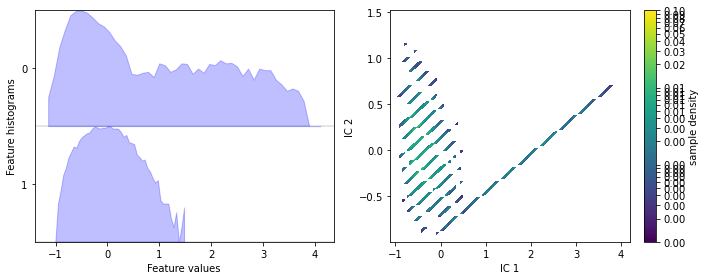

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('tica.png')

NameError: name 'reader_concatenated' is not defined

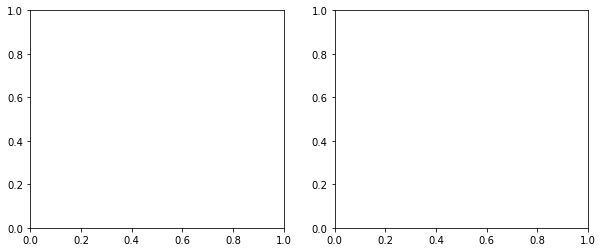

In [14]:
### no tica, just input features

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    reader_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*reader_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('feat.png')

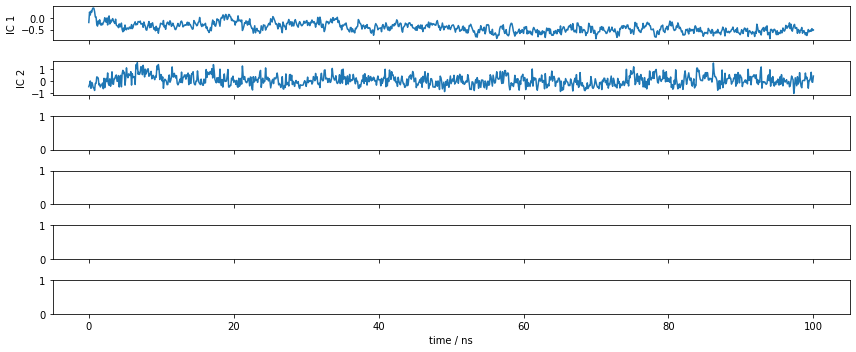

In [15]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
plt.savefig('ics.png')

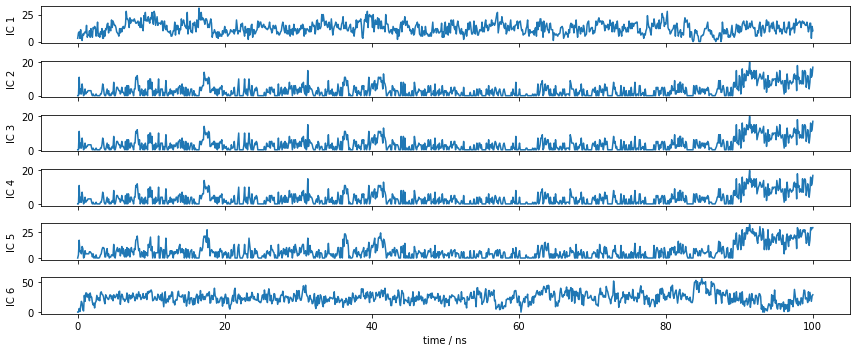

In [99]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(reader_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, reader_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
plt.savefig('ics_reader.png')

In [21]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=200, max_iter=100, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                                        | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|                                                  | 0/100 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                                   | 0/5 [00:00<?, ?it/s]

In [16]:
cluster = pyemma.coordinates.cluster_kmeans(
    reader_output, k=200, max_iter=100, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

NameError: name 'reader_output' is not defined

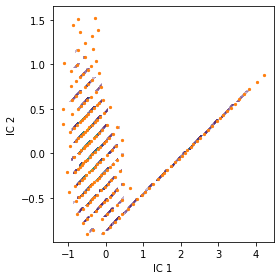

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|                                              | 0/11 [00:00<?, ?it/s]

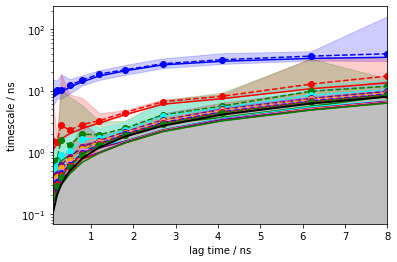

In [23]:
its = pyemma.msm.its(cluster.dtrajs, lags=80, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

In [25]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=40, dt_traj='0.2 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[7]: compute stat. inefficiencies:   0%| | 0/3595 [0

pyemma.msm.estimators.bayesian_msm.BayesianMSM[7]: Sampling MSMs:   0%|   | 0/100 [00:00<?, ?it/s]

fraction of states used = 1.00
fraction of counts used = 1.00


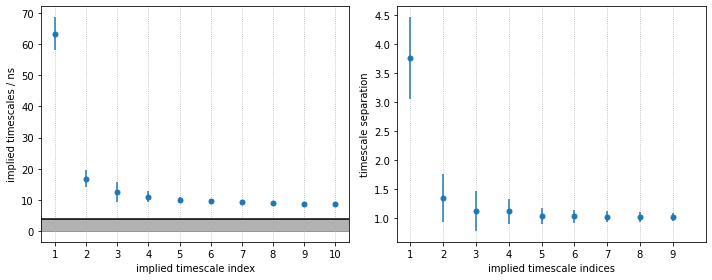

In [26]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
plt.savefig('spectral.png')

estimating BayesianMSM:   0%|                                               | 0/5 [00:00<?, ?it/s]

/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 198 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 197 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 194 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


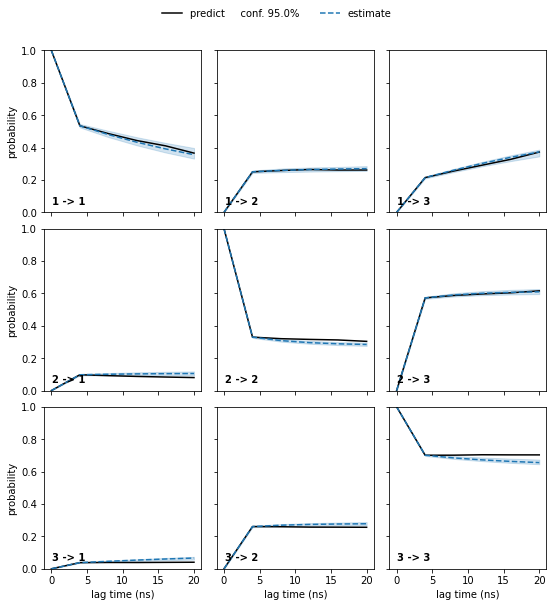

In [27]:
nstates = 3
cktest = msm.cktest(nstates, mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');


In [28]:
msm.pcca(nstates)

PCCA(P=array([[3.63636e-02, 0.00000e+00, ..., 0.00000e+00, 8.48475e-03],
       [0.00000e+00, 5.55112e-16, ..., 0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, ..., 4.44089e-16, 0.00000e+00],
       [1.92223e-02, 0.00000e+00, ..., 0.00000e+00, 3.70370e-02]]),
   m=3)

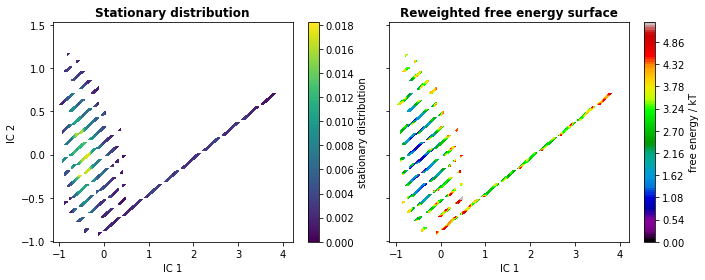

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
plt.savefig('macro_energy.png')

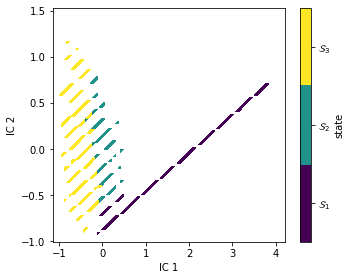

In [30]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [34]:
!conda install --yes nglview -c conda-forge


Solving environment: done

## Package Plan ##

  environment location: /home/jaybraun/miniconda3

  added / updated specs:
    - nglview


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py39hf3d152e_0         155 KB  conda-forge
    conda-4.13.0               |   py39hf3d152e_1         998 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following packages will be UPDATED:

  ca-certificates                    2022.5.18.1-ha878542_0 --> 2022.6.15-ha878542_0
  certifi                        2022.5.18.1-py39hf3d152e_0 --> 2022.6.15-py39hf3d152e_0
  conda                               4.12.0-py39hf3d152e_0 --> 4.13.0-py39hf3d152e_1



certifi-2022.6.15    | 155 KB    | #############

In [35]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3
1,0.00,73.54,80.32
2,461.32,0.00,27.10
3,537.17,89.05,0.00


In [36]:
tr=['whole.1.xtc','whole.2.xtc','whole.3.xtc','whole.4.xtc','whole.6.xtc']

In [37]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(tr, top='6.6_2.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./pcca{}_cont.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                                  | 0/5 [00:00<?, ?it/s]

['./pcca1_cont.gro', './pcca2_cont.gro', './pcca3_cont.gro']

In [38]:
def visualize_metastable(samples, cmap, selection='not element H'):
    """ visualize metastable states
    Parameters
    ----------
    samples: list of mdtraj.Trajectory objects
        each element contains all samples for one metastable state.
    cmap: matplotlib.colors.ListedColormap
        color map used to visualize metastable states before.
    selection: str
        which part of the molecule to selection for visualization. For details have a look here:
        http://mdtraj.org/latest/examples/atom-selection.html#Atom-Selection-Language
    """
    import nglview
    from matplotlib.colors import to_hex

    widget = nglview.NGLWidget()
    widget.clear_representations()
    ref = samples[0]
    for i, s in enumerate(samples):
        s = s.superpose(ref, atom_indices=s.top.select('resid 2 3 and mass > 2'))
        s = s.atom_slice(s.top.select(selection))
        comp = widget.add_trajectory(s)
        comp.add_licorice()

    # this has to be done in a separate loop for whatever reason...
    x = np.linspace(0, 1, num=len(samples))
    for i, x_ in enumerate(x):
        c = to_hex(cmap(x_))
        widget.update_licorice(color=c, component=i, repr_index=i)
        widget.remove_cartoon(component=i)
    return widget

In [41]:
my_samples = [pyemma.coordinates.save_traj(tr, idist, outfile=None, top=)
              for idist in msm.sample_by_distributions(msm.metastable_distributions, 50)]

cmap = mpl.cm.get_cmap('viridis', nstates)
visualize_metastable(my_samples, cmap)

Obtaining file info:   0%|                                                  | 0/5 [00:00<?, ?it/s]

Obtaining file info:   0%|                                                  | 0/4 [00:00<?, ?it/s]

Obtaining file info:   0%|                                                  | 0/4 [00:00<?, ?it/s]

NGLWidget(max_frame=49)

print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

In [43]:
start, final = 0, 2
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 5

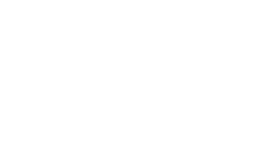

In [44]:
fig = plt.figure(figsize=(3.47, 1.804))
gw = int(np.floor(0.5 + 1000 * fig.get_figwidth()))
gh = int(np.floor(0.5 + 1000 * fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0, left=0.0, right=1.0, bottom=0.0, top=1.0)

ax_box = fig.add_subplot(gs[:, :])
ax_box.set_axis_off()

posx = cgflux.forward_committor
posy = 0.1 * np.array([4.5, 2.3, 2.3, 7, 4.5])
pos = np.vstack([posx, posy]).T

sizes = [[385, 432], [388, 526], [347, 500], [367, 348], [260, 374]]
anchors = [[1120, 950], [220, 500], [1630, 830], [2800, 600], [1600, 50]]
for i, ((w, h), (x, y)) in enumerate(zip(sizes, anchors)):
    ax_ = fig.add_subplot(gs[y:y+h, x:x+w])
    ax_.set_axis_off()
    ax_.text(0, 500, r'$\mathcal{S}_' + '{}$'.format(i + 1))
    ax_.imshow(plt.imread('static/hmm-backbone-{}-{}x{}.png'.format(i + 1, w, h)))

flux_ax = fig.add_subplot(gs[:1500, :])
pyemma.plots.plot_flux(
    cgflux,
    pos=pos,
    ax=flux_ax,
    state_sizes=np.array([1.5 for _ in range(len(cgflux.stationary_distribution))]),
    state_colors='None',
    max_width=15,
    max_height=15,
    minflux=2e-5,
    arrow_scale=1.,
    size=5,
    state_labels=None,
    show_committor=True)
flux_ax.set_xticks(np.arange(0, 1.2, .2))

fig.savefig('data/figure_6.pdf', dpi=300)